# First steps with OMEGA - Closed box

Prepared by Benoit Côté.  If you have any question, please contact Benoit Côté at <bcote@uvic.ca> or Christian Ritter at <critter@uvic.ca>.

A closed box in chemical evolution refers to a gas reservoir which does not exchange matter with its surrounding.  There is nothing coming out of the box, and nothing coming in the box.  The star formation and the enrichment process therefore take place inside an isolate environment.  This notebook presents the basics input parameters that can modify your chemical evolution predictions.

In [2]:
# Python packages
%matplotlib nbagg
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

# Shared class between SYGMA and OMEGA
import chem_evol
reload(chem_evol)

# One-zone galactic chemical evolution code
import omega
reload(omega)

<module 'omega' from '/Users/benoitcote/Desktop/OMEGA_SYGMA_inheritance/omega.pyc'>

## 1. Initial mass of the gas reservoir

The mass of gas plays a crucial role in chemical evolution, as it sets the concentration of metals at each timestep.  For example, for a fixed star formation history, a smaller gas reservoir will lead to a faster enrichment.  In the following examples, we assume a primordial gas composition (only H, He, and Li).

In [3]:
# Run OMEGA simulations.
# Constant star formation rate, "cte_sfr", of 1 Msun/yr
# with different gas reservoir, "mgal", in units of solar mass.
o_res_1e10 = omega.omega(cte_sfr=1.0, mgal=1e10)
o_res_1e11 = omega.omega(cte_sfr=1.0, mgal=1e11)
o_res_1e12 = omega.omega(cte_sfr=1.0, mgal=1e12)

OMEGA run in progress..
   OMEGA run completed - Run time: 1.5s
OMEGA run in progress..
   OMEGA run completed - Run time: 1.43s
OMEGA run in progress..
   OMEGA run completed - Run time: 1.54s


In the plot below, we can see with the blue line that star formation slowly consumes the galactic gas.  Even if stars eject matter, a fraction of the original stellar mass will always be locked in stellar remnants (white dwarfs, neutron stars, black holes). This feature, however, is not visible when the mass of gas reservoir is very large (red line), compared to the total stellar mass formed.

<IPython.core.display.Javascript object>


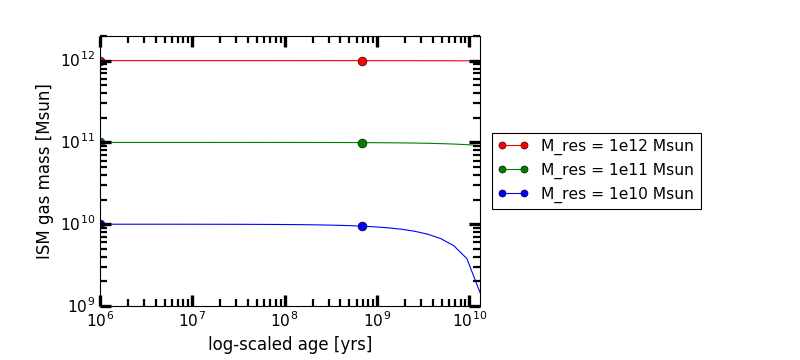

(1000000000.0, 2000000000000.0)

In [4]:
# Plot the total mass of the gas reservoir as a function of time.
%matplotlib nbagg
o_res_1e12.plot_totmasses(color='r', label='M_res = 1e12 Msun')
o_res_1e11.plot_totmasses(color='g', label='M_res = 1e11 Msun')
o_res_1e10.plot_totmasses(color='b', label='M_res = 1e10 Msun')
plt.ylim(1e9, 2e12)

### 1.1. Evolution of the Fe concentration

[Fe/H] is often used as a proxi for time in galactic chemical evolution studies.  But the relation between [Fe/H] and galactic age is not linear, as seen in the plot below.

<IPython.core.display.Javascript object>


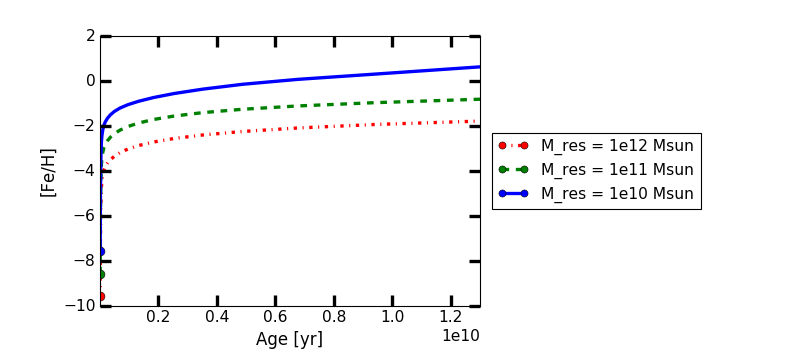

In [5]:
# Plot the iron concentration of the gas reservoir as a function of time
%matplotlib nbagg
yaxis = '[Fe/H]'
o_res_1e12.plot_spectro(yaxis=yaxis, color='r', label='M_res = 1e12 Msun', shape='-.')
o_res_1e11.plot_spectro(yaxis=yaxis, color='g', label='M_res = 1e11 Msun', shape='--')
o_res_1e10.plot_spectro(yaxis=yaxis, color='b', label='M_res = 1e10 Msun', shape='-')
#plt.xscale('log')

### 1.2. Evolution of chemical abundances

Although the mass of gas plays a significant role in the evolution of [Fe/H], the abundances provided by stellar yields are still similar from one case to another, as shown below.

<IPython.core.display.Javascript object>


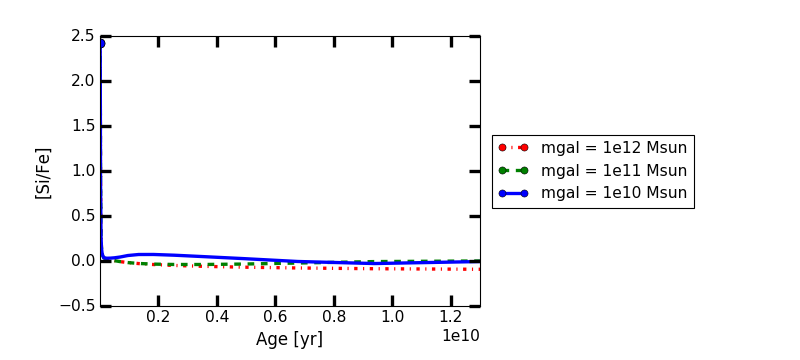

In [6]:
# Plot the Si to Fe abundances of the gas reservoir as a function of time (you can try different elements).
%matplotlib nbagg
xaxis = 'age'
yaxis = '[Si/Fe]'
o_res_1e12.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='r', label='mgal = 1e12 Msun', shape='-.')
o_res_1e11.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='g', label='mgal = 1e11 Msun', shape='--')
o_res_1e10.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='b', label='mgal = 1e10 Msun', shape='-')

In the [X/Fe] vs [Fe/H] space, **scaling up and down the mass of gas shifts the predictions on the [Fe/H] axis**, almost like a pure translation, as shown below.

<IPython.core.display.Javascript object>


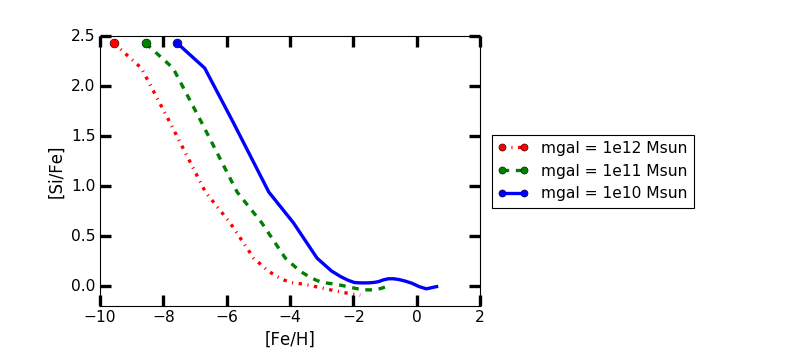

(-0.2, 2.5)

In [7]:
# Plot the Si to Fe abundances of the gas reservoir as a function of [Fe/H]
%matplotlib nbagg
yaxis = '[Si/Fe]'
xaxis = '[Fe/H]'
o_res_1e12.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='r', label='mgal = 1e12 Msun', shape='-.')
o_res_1e11.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='g', label='mgal = 1e11 Msun', shape='--')
o_res_1e10.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='b', label='mgal = 1e10 Msun', shape='-')
plt.ylim(-0.2, 2.5)

## 2. Number of Type Ia supernovae

SNe Ia can eject a significant amount of Fe.  In the [X/Fe] vs [Fe/H] space, if SNe Ia do not eject significantly the element X compared to core-collapse SNe (CC SNe) or AGB stars, increasing the number of SNe Ia will increase your final Fe abundances without modifying the element X.  In other words, [X/Fe] will decrease, but [Fe/H] will increase.

In [8]:
# Run OMEGA simulations
# Different numbers of SNe Ia per stellar mass, "nb_1a_per_m",
# formed in each simple stellar population (SYGMA). Here, we use
# the same gas reservoir to isolate the impact of "nb_1a_per_m".
o_res_1e10_low_Ia  = omega.omega(cte_sfr=1.0, mgal=1e10, nb_1a_per_m=1.0e-4)
o_res_1e10         = omega.omega(cte_sfr=1.0, mgal=1e10, nb_1a_per_m=1.0e-3)
o_res_1e10_high_Ia = omega.omega(cte_sfr=1.0, mgal=1e10, nb_1a_per_m=1.0e-2)

OMEGA run in progress..
   OMEGA run completed - Run time: 1.61s
OMEGA run in progress..
   OMEGA run completed - Run time: 1.47s
OMEGA run in progress..
   OMEGA run completed - Run time: 1.45s


As seen in the above below, SNe Ia only appear at [Fe/H] = -2.5 in our case.  Below this [Fe/H] value, the predictions are mainly driven by the ejecta of massive stars, which have short lifetimes compared to SN Ia progenitor stars.

<IPython.core.display.Javascript object>


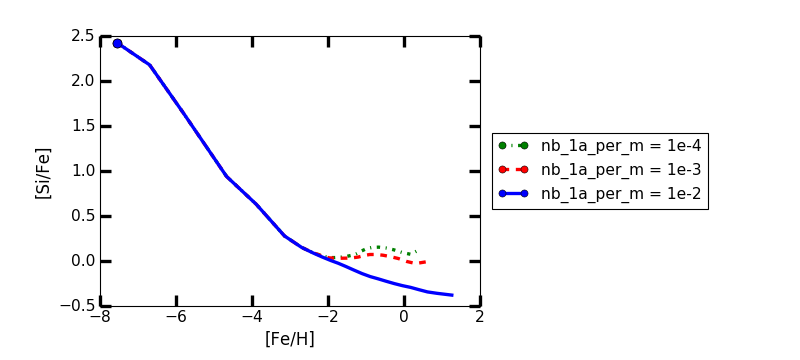

In [9]:
# Plot the iron concentration of the gas reservoir as a function of time
%matplotlib nbagg
xaxis = '[Fe/H]'
yaxis = '[Si/Fe]'
o_res_1e10_low_Ia.plot_spectro( xaxis=xaxis, yaxis=yaxis, color='g', label='nb_1a_per_m = 1e-4', shape='-.')
o_res_1e10.plot_spectro(        xaxis=xaxis, yaxis=yaxis, color='r', label='nb_1a_per_m = 1e-3', shape='--')
o_res_1e10_high_Ia.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='b', label='nb_1a_per_m = 1e-2', shape='-')

The plot below shows the contribution of SNe Ia, AGB stars, and massive stars in the Fe content of the gas reservoir (one-zone version of the interstellar medium), using different values for *nb_1a_per_m*.

<IPython.core.display.Javascript object>


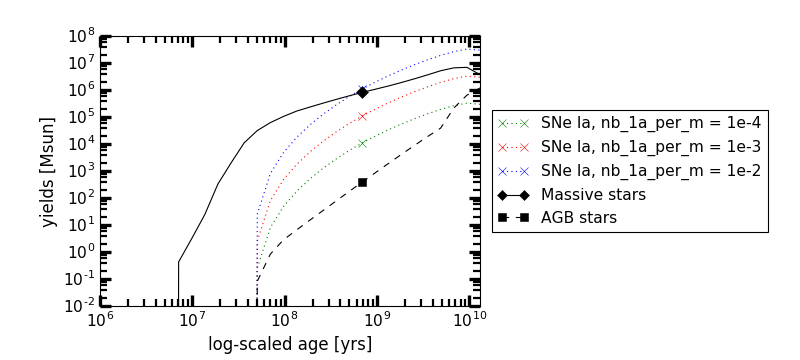

In [10]:
# Plot the mass of Fe present inside the gas reservoir as a function of time.
%matplotlib nbagg
specie = 'Fe'

# Contribution of SNe Ia.
o_res_1e10_low_Ia.plot_mass( specie=specie, color='g', label='SNe Ia, nb_1a_per_m = 1e-4', source='sn1a')
o_res_1e10.plot_mass(        specie=specie, color='r', label='SNe Ia, nb_1a_per_m = 1e-3', source='sn1a')
o_res_1e10_high_Ia.plot_mass(specie=specie, color='b', label='SNe Ia, nb_1a_per_m = 1e-2', source='sn1a')

# Contribution of massive (winds+SNe) and AGB stars.
o_res_1e10.plot_mass(specie=specie, color='k', label='Massive stars', source='massive', shape='-')
o_res_1e10.plot_mass(specie=specie, color='k', label='AGB stars',     source='agb',    shape='--')
# You can drop the 'source' argument to plot the sum the contribution of all stars.

As shown above, SNe Ia appear after 50 Myr of evolution, regardless of the total number of SNe Ia.  However, **their contribution to the chemical evolution will not be noticable until they start to overcome the contribution of massive stars**, which is around 200 Myr for the blue line.  The plot below shows the evolution of [Fe/H] using different total numbers of SNe Ia.

<IPython.core.display.Javascript object>


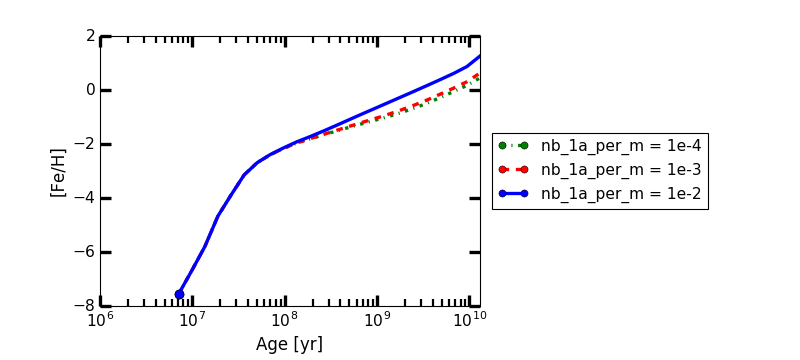

In [11]:
# Plot the evolution of [Fe/H] as a function of time.
%matplotlib nbagg
yaxis = '[Fe/H]'
o_res_1e10_low_Ia.plot_spectro( yaxis=yaxis, color='g', label='nb_1a_per_m = 1e-4', shape='-.')
o_res_1e10.plot_spectro(        yaxis=yaxis, color='r', label='nb_1a_per_m = 1e-3', shape='--')
o_res_1e10_high_Ia.plot_spectro(yaxis=yaxis, color='b', label='nb_1a_per_m = 1e-2', shape='-')
plt.xscale('log')

The reason why the green and red lines are so similar is because CC SNe are dominating the Fe ejection, as opposed to the blue line case.  Different chemical evolution studies typically assume $\sim[1-2]\times10^{-3}$ SN Ia per stellar mass formed.

## 3. Star formation history

The star formation history (SFH) sets how many stars are formed as a function of time.  Modifying the SFH can change the chemical enrichment timescale.

###3.1. Setting the input SFH

Let's run three OMEGA simulations with decreasing, constant, and increasing SFHs.

In [12]:
# OMEGA can receive an input SFH array with the "sfh_array" parameter.
# sfh_array[ number of input times ][ 0 --> time in yr; 1 --> star formation rate in Msun/yr ]

# Time array [Gyr]
t = [0.0, 6.5e9, 13.0e9]

# Build the decreasing star formation history array [Msun/yr]
sfr_dec = [7.0, 4.0, 1.0]
sfh_array_dec = []
for i in range(len(t)):
    sfh_array_dec.append([t[i], sfr_dec[i]])

# Build the increasing star formation history array [Msun/yr]
sfr_inc = [1.0, 4.0, 7.0]
sfh_array_inc = []
for i in range(len(t)):
    sfh_array_inc.append([t[i], sfr_inc[i]])

In [13]:
# Run OMEGA simulations.
# Different star formation histories within the same initial gas reservoir.
o_cte = omega.omega(mgal=5e11, special_timesteps=30, cte_sfr=4.0)
o_dec = omega.omega(mgal=5e11, special_timesteps=30, sfh_array=sfh_array_dec)
o_inc = omega.omega(mgal=5e11, special_timesteps=30, sfh_array=sfh_array_inc)

OMEGA run in progress..
   OMEGA run completed - Run time: 1.54s
OMEGA run in progress..
   OMEGA run completed - Run time: 1.44s
OMEGA run in progress..
   OMEGA run completed - Run time: 1.51s


Below, the SFH is plotted.  This function can be used for any types of input SFH.

<IPython.core.display.Javascript object>


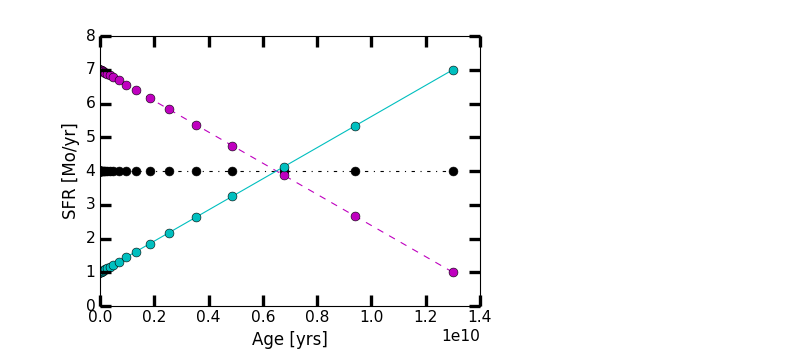

In [15]:
%matplotlib nbagg
o_cte.plot_star_formation_rate(color='k', shape='-.')
o_dec.plot_star_formation_rate(color='m', shape='--')
o_inc.plot_star_formation_rate(color='c', shape='-')

In this case, although the SFH are very different, the same amount of stars should be formed throughout the simulation.  This can be verified by summing the mass locked into stars in all timesteps.  However, as shown below, the total stellar masses are actually not the same.

In [16]:
# Calculate the cumulated stellar mass (integration of the SFH)
print 'Total stellar mass formed (not corrected for stellar mass loss)'
print '  Increasing SFH :', sum(o_inc.history.m_locked), 'Msun'
print '  Constant SFH   :', sum(o_cte.history.m_locked), 'Msun'
print '  Decreasing SFH :', sum(o_dec.history.m_locked), 'Msun'

Total stellar mass formed (not corrected for stellar mass loss)
  Increasing SFH : 45686459269.9 Msun
  Constant SFH   : 52000000000.0 Msun
  Decreasing SFH : 58313540730.1 Msun


This discrepancy is due to a temporal resolution issue and to the fact that the value of the SFH at each timestep is multiplied by the duration of that timestep.  To solve this problem, you can use the *sfh_array_norm* parameter which normalizes the input SFH array, *sfh_array*, to generate the desired total stellar mass, regardless of the chosen resolution.

In [17]:
# Re-run OMEGA simulations with the "sfh_array_norm" parameter.
o_cte = omega.omega(mgal=5e11, special_timesteps=30, cte_sfr=4.0,             sfh_array_norm=5.2e10)
o_dec = omega.omega(mgal=5e11, special_timesteps=30, sfh_array=sfh_array_dec, sfh_array_norm=5.2e10)
o_inc = omega.omega(mgal=5e11, special_timesteps=30, sfh_array=sfh_array_inc, sfh_array_norm=5.2e10)

OMEGA run in progress..
   OMEGA run completed - Run time: 1.45s
OMEGA run in progress..
   OMEGA run completed - Run time: 1.56s
OMEGA run in progress..
   OMEGA run completed - Run time: 1.43s


The resulting SFHs are a little bit shifted, but the total stellar masses are now the same, as shown below.

<IPython.core.display.Javascript object>


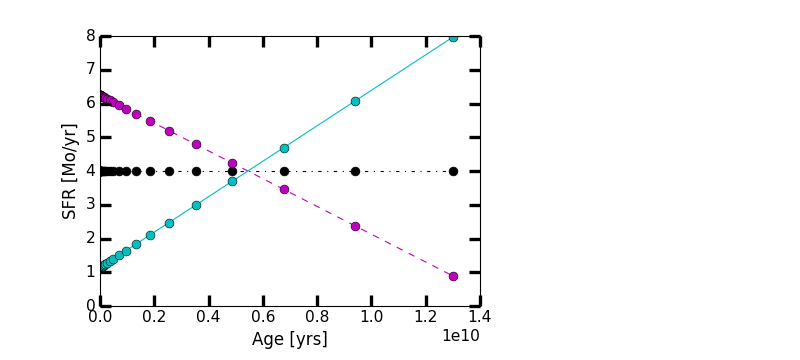

In [18]:
%matplotlib nbagg
o_cte.plot_star_formation_rate(color='k', shape='-.')
o_dec.plot_star_formation_rate(color='m', shape='--')
o_inc.plot_star_formation_rate(color='c', shape='-')

In [19]:
# Calculate the cumulated stellar mass (integration of the SFH)
print 'Total stellar mass formed (not corrected for stellar mass loss)'
print '  Increasing SFH :', sum(o_inc.history.m_locked), 'Msun'
print '  Constant SFH   :', sum(o_cte.history.m_locked), 'Msun'
print '  Decreasing SFH :', sum(o_dec.history.m_locked), 'Msun'

Total stellar mass formed (not corrected for stellar mass loss)
  Increasing SFH : 52000000000.0 Msun
  Constant SFH   : 52000000000.0 Msun
  Decreasing SFH : 52000000000.0 Msun


### 3.2. Evolution of Fe in the gas reservoir

As shown in the plot below, more Fe is ejected by stars at early times when the SFH peaks at the beginning of the simulation (pink lines).  At the end of the simulation (after 13 Gyr), the same final mass of Fe inside the galactic gas is predicted for all three SFHs.  This is because, overall, the same amount of stars is formed in all cases.  However, for the contribution of AGB stars, there are minor variations.  Can you explain why?

<IPython.core.display.Javascript object>


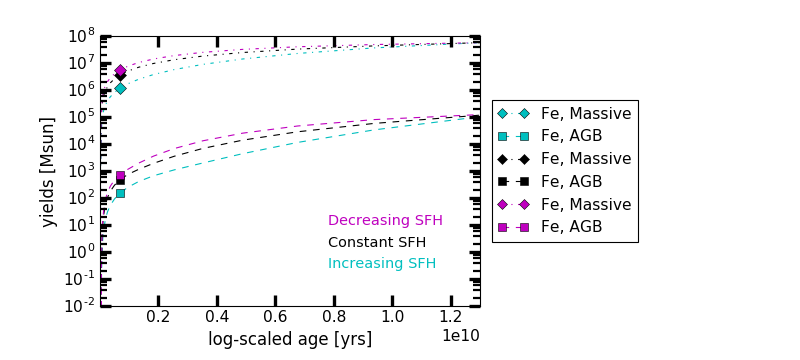

In [20]:
# Plot the mass of Fe present inside the gas reservoir as a function of time (you can try other elements).
%matplotlib nbagg
specie = 'Fe'

# Increasing SFH
o_inc.plot_mass(specie=specie, color='c', source='massive')
#o_inc.plot_mass(specie=specie, color='c', source='sn1a')
o_inc.plot_mass(specie=specie, color='c', source='agb')

# Constant SFH
o_cte.plot_mass(specie=specie, color='k', source='massive')
#o_cte.plot_mass(specie=specie, color='k', source='sn1a')
o_cte.plot_mass(specie=specie, color='k', source='agb')

# Decreasing SFH
o_dec.plot_mass(specie=specie, color='m', source='massive')
#o_dec.plot_mass(specie=specie, color='m', source='sn1a')
o_dec.plot_mass(specie=specie, color='m', source='agb')

# Add legend directly on the plot
plt.annotate('Decreasing SFH', color='m', xy=(0.6, 0.30), xycoords='axes fraction', fontsize=13)
plt.annotate('Constant SFH',   color='k', xy=(0.6, 0.22), xycoords='axes fraction', fontsize=13)
plt.annotate('Increasing SFH', color='c', xy=(0.6, 0.14), xycoords='axes fraction', fontsize=13)

# Remove the default log scale of the x axis
plt.xscale('linear')

### 3.3. Evolution of chemical abundances

Because we used the same initial gas reservoir and the same total stellar mass, **different SFHs therefore generate different enrichment paths** between the initial and final [Fe/H] values, which are the same in all cases. Within our setup, when the SFH is increasing, the enrichment process will be slower compared to SFHs that peak at early times (decreasing SFH).

<IPython.core.display.Javascript object>


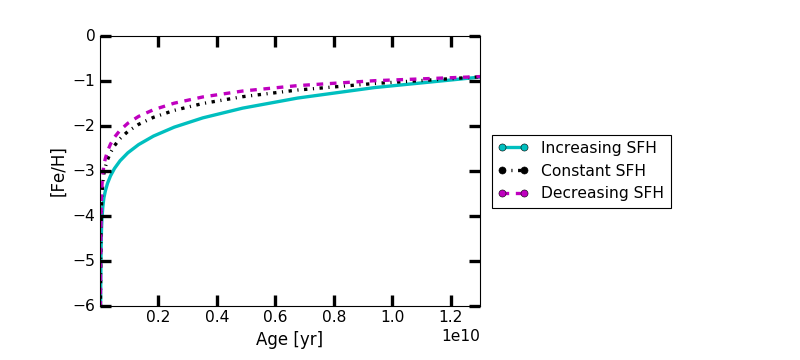

(-6, 0)

In [21]:
# Plot the evolution of [Fe/H]
%matplotlib nbagg
o_inc.plot_spectro(color='c', shape='-',  label='Increasing SFH')
o_cte.plot_spectro(color='k', shape='-.', label='Constant SFH')
o_dec.plot_spectro(color='m', shape='--', label='Decreasing SFH')
plt.ylim(-6,0)

However, as seen in the plot below, the relative metal abundances are still similar from one case to another, as those are linked to the composition of the ejecta of simple stellar populations (stellar yields).

<IPython.core.display.Javascript object>


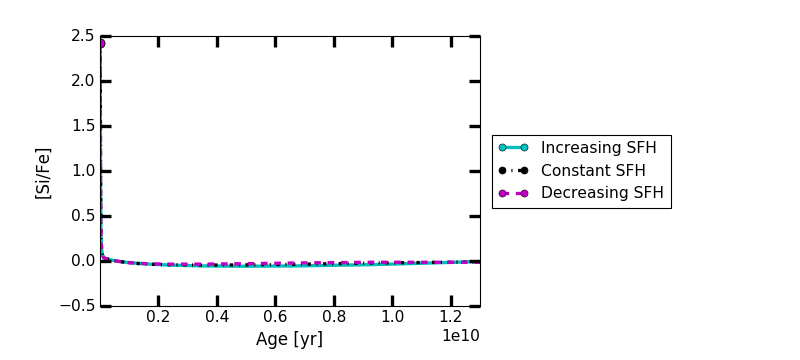

In [22]:
# Plot the evolution of [Si/Fe].
%matplotlib nbagg
yaxis = '[Si/Fe]'
o_inc.plot_spectro(yaxis=yaxis, color='c', shape='-',  label='Increasing SFH')
o_cte.plot_spectro(yaxis=yaxis, color='k', shape='-.', label='Constant SFH')
o_dec.plot_spectro(yaxis=yaxis, color='m', shape='--', label='Decreasing SFH')

As shown below, in the [X/Fe] vs [Fe/H] space, **modifying the SFH shifts the chemical evolution predictions on the [Fe/H] axis, but only at low [Fe/H] (at early times)**, as opposed to modifying the mass of the gas reservoir, which generate shifts for all [Fe/H] values.

<IPython.core.display.Javascript object>


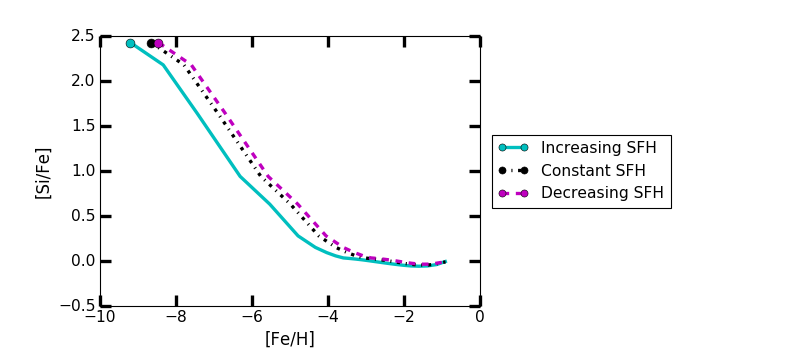

In [23]:
# Plot the predicted chemical evolution.
%matplotlib nbagg
xaxis = '[Fe/H]'
yaxis = '[Si/Fe]'
o_inc.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='c', shape='-',  label='Increasing SFH')
o_cte.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='k', shape='-.', label='Constant SFH')
o_dec.plot_spectro(xaxis=xaxis, yaxis=yaxis, color='m', shape='--', label='Decreasing SFH')